#                          <center> <div color = "blue">INTELLIGENCE ARTIFICIELLE</div> <br /><br /> PROJET IA for HumanForYou
</center>        





###                             <center> CESICDP GROUPE 2 </center>

#####  <center> Adrian SALAUM <br /><br /> Coralistone METSA<br /><br /> Romain COTTINEAU  <br /><br />Simon BRIFFAUD <br /><br /> </center>


##### ########################################################################################################################

##### ########################################################################################################################

##                     <center> <br />  I. RAPPEL DU CONTEXTE </center>                                                     

L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Cependant, chaque année elle subit un turn-over d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi.

La direction trouve que ce niveau de turn-over n'est pas bon pour l'entreprise car :

Les projets sur lesquels étaient les employés quittant la société prennent du retard ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.

Un service de ressources humaines de taille conséquente doit être conservé car il faut avoir les moyens de trouver les nouvelles recrues.

Du temps est perdu à l'arrivée des nouveaux employés car ils doivent très souvent être formés et ont besoin de temps pour devenir pleinement opérationnels dans leur nouvel environnement.

Le direction fait donc appel à vous, spécialistes de l'analyse de données, pour déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over et lui proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.

Données fournies
Un certain nombre de données concernant les employés vous a donc été transmis par le service des ressources humaines.

Il s'agit de fichiers textes au format CSV.

Les données ont été anonymisées : un employé de l'entreprise sera représenté par le même EmployeeID dans l'ensemble des fichiers qui suivent.

##               <center>  <br /> <br /> 1. Pre-traitement des données et analyse exploratoire </center>   

## Chargement des données.

In [1]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

DOWNLOAD_URLS = [
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/employee_survey_data.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/general_data.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/in_time.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/manager_survey_data.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/out_time.csv"
]
HOUSING_PATH = os.path.join("datasets", "employees")

def load_project_data(download_urls=DOWNLOAD_URLS, housing_path=HOUSING_PATH):    
    dataframes = {}
    
    for url in DOWNLOAD_URLS:
        file_name = url.split('/')[-1].split('.')[0]
        df = pd.read_csv(url)
        if df.keys()[0] != "EmployeeID":
            df.rename({df.keys()[0]:"EmployeeID"}, axis='columns', errors="raise", inplace=True)
        df.set_index("EmployeeID", inplace=True)
        dataframes[file_name] = df
    
    return dataframes

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### On vérifie si les données sont correctement chargées

In [3]:
data = load_project_data()

In [4]:
general_df = pd.concat(data.values(), axis=1)
general_df.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


## Première analyse graphique

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Count'>

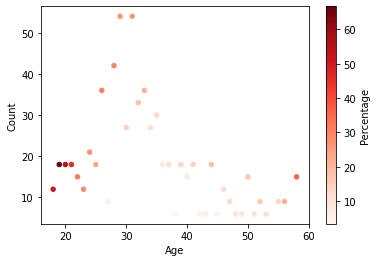

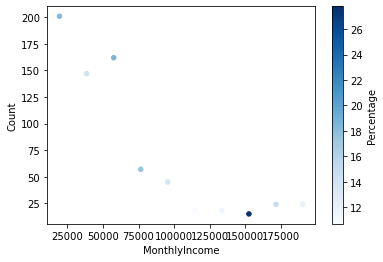

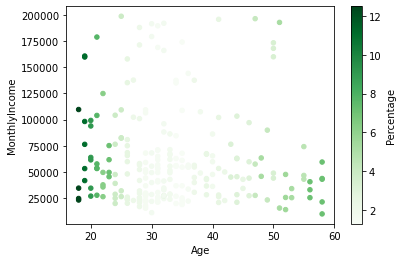

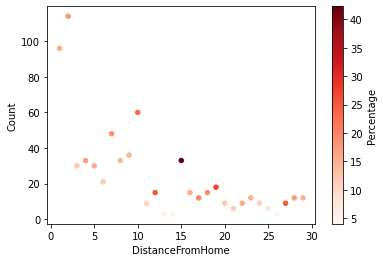

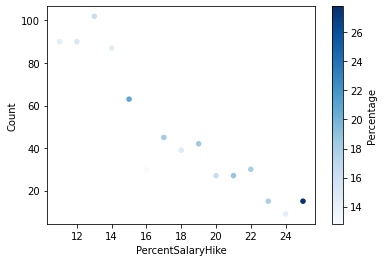

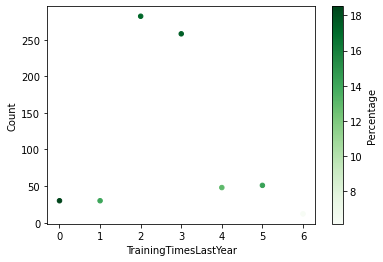

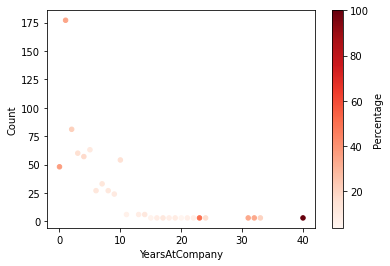

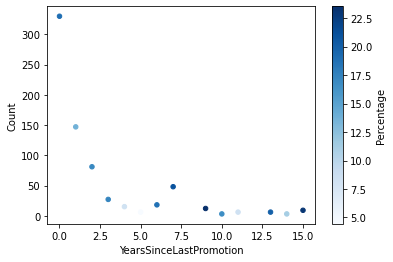

In [5]:
# Récupère l'age et l'attrition qui lui est associé
df_age = general_df[['Age', 'Attrition']]
# On compte le nombre de Yes et de No par Ages
df_age = df_age.groupby(['Age', 'Attrition']).size().reset_index(name='Count')
# On fait le pourcentage d'Attrition en Yes par rapport au total
df_age['Percentage'] = df_age.groupby('Age')['Count'].apply(lambda x: x / x.sum() * 100)
# On ne garde que les Yes
df_test = df_age[df_age['Attrition'] == 'Yes']
# On affiche le nuage de points des ages et des pourcentages d'attrition avec une echelle de couleur, en x on a l'age et en y le count d'attrition
df_test.plot.scatter(x='Age', y='Count', c='Percentage', colormap='Reds', sharex=False)

# Recupère le montant de la rémunération et l'attrition qui lui est associé
df_income = general_df[['MonthlyIncome', 'Attrition']]

# Classe les salaires en 10 tranches entre le minimum et le maximum de MonthlyIncome
df_income['MonthlyIncome'] = pd.cut(df_income['MonthlyIncome'], 10)
# Compte le nombre de départ dans chaque tranche de salaire
df_income = df_income.groupby(['MonthlyIncome', 'Attrition']).size().reset_index(name='Count')
# On ne garde que les Yes
df_income['MonthlyIncome'] = df_income['MonthlyIncome'].apply(lambda x: x.mid)
# On fait le pourcentage d'Attrition en Yes par rapport au total
df_income['Percentage'] = df_income.groupby('MonthlyIncome')['Count'].apply(lambda x: x / x.sum() * 100)
# Transforme les tranches de salaire en nombres
df_income = df_income[df_income['Attrition'] == 'Yes']
# On affiche le nuage de points des salaires et des pourcentages d'attrition avec une echelle de couleur, en x on a le salaire et en y le count d'attrition
df_income.plot.scatter(x="MonthlyIncome", y='Count', c='Percentage', colormap='Blues', sharex=False)

# Compare l'age de ceux qui ont quitté l'entreprise et leur salaire
df_age_income = general_df[['Age', 'MonthlyIncome', 'Attrition']]
# On calcul le pourcentage d'attrition par rapport au total
df_age_income = df_age_income.groupby(['Age', 'MonthlyIncome', 'Attrition']).size().reset_index(name='Count')
df_age_income['Percentage'] = df_age_income.groupby('Age')['Count'].apply(lambda x: x / x.sum() * 100)
# On ne garde que les Yes
df_age_income = df_age_income[df_age_income['Attrition'] == 'Yes']
# On affiche le nuage de points des ages et des salaires avec une echelle de couleur, en x on a l'age et en y le salaire
df_age_income.plot.scatter(x='Age', y='MonthlyIncome', c='Percentage', colormap='Greens', sharex=False)

df_distance_from_home = general_df[['DistanceFromHome', 'Attrition']]
df_distance_from_home = df_distance_from_home.groupby(['DistanceFromHome', 'Attrition']).size().reset_index(name='Count')
df_distance_from_home['Percentage'] = df_distance_from_home.groupby('DistanceFromHome')['Count'].apply(lambda x: x / x.sum() * 100)
df_distance_from_home = df_distance_from_home[df_distance_from_home['Attrition'] == 'Yes']
df_distance_from_home.plot.scatter(x='DistanceFromHome', y='Count', c='Percentage', colormap='Reds', sharex=False)

df_perc_salary_hike = general_df[['PercentSalaryHike', 'Attrition']]
df_perc_salary_hike = df_perc_salary_hike.groupby(['PercentSalaryHike', 'Attrition']).size().reset_index(name='Count')
df_perc_salary_hike['Percentage'] = df_perc_salary_hike.groupby('PercentSalaryHike')['Count'].apply(lambda x: x / x.sum() * 100)
df_perc_salary_hike = df_perc_salary_hike[df_perc_salary_hike['Attrition'] == 'Yes']
df_perc_salary_hike.plot.scatter(x='PercentSalaryHike', y='Count', c='Percentage', colormap='Blues', sharex=False)

df_formation = general_df[['TrainingTimesLastYear', 'Attrition']]
df_formation = df_formation.groupby(['TrainingTimesLastYear', 'Attrition']).size().reset_index(name='Count')
df_formation['Percentage'] = df_formation.groupby('TrainingTimesLastYear')['Count'].apply(lambda x: x / x.sum() * 100)
df_formation = df_formation[df_formation['Attrition'] == 'Yes']
df_formation.plot.scatter(x='TrainingTimesLastYear', y='Count', c='Percentage', colormap='Greens', sharex=False)

df_years_at_company = general_df[['YearsAtCompany', 'Attrition']]
df_years_at_company = df_years_at_company.groupby(['YearsAtCompany', 'Attrition']).size().reset_index(name='Count')
df_years_at_company['Percentage'] = df_years_at_company.groupby('YearsAtCompany')['Count'].apply(lambda x: x / x.sum() * 100)
df_years_at_company = df_years_at_company[df_years_at_company['Attrition'] == 'Yes']
df_years_at_company.plot.scatter(x='YearsAtCompany', y='Count', c='Percentage', colormap='Reds', sharex=False)

df_years_since_last_promotion = general_df[['YearsSinceLastPromotion', 'Attrition']]
df_years_since_last_promotion = df_years_since_last_promotion.groupby(['YearsSinceLastPromotion', 'Attrition']).size().reset_index(name='Count')
df_years_since_last_promotion['Percentage'] = df_years_since_last_promotion.groupby('YearsSinceLastPromotion')['Count'].apply(lambda x: x / x.sum() * 100)
df_years_since_last_promotion = df_years_since_last_promotion[df_years_since_last_promotion['Attrition'] == 'Yes']
df_years_since_last_promotion.plot.scatter(x='YearsSinceLastPromotion', y='Count', c='Percentage', colormap='Blues', sharex=False)

## Pré-traitement des données (data wrangling)

#### On fait en sorte que chaque colonne ait un nom unique

En effet, les colonnes de _in_time_ et _out_time_ ont les mêmes noms

In [6]:
def renameColumnsWithSameName(df):
    cols=pd.Series(df.columns)
    for dup in df.columns[df.columns.duplicated(keep=False)]: 
        cols[df.columns.get_loc(dup)] = ([dup + '.' + str(d_idx) 
                                         if d_idx != 0 
                                         else dup 
                                         for d_idx in range(df.columns.get_loc(dup).sum())]
                                        )
    df.columns=cols

In [7]:
renameColumnsWithSameName(general_df)
general_df.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,2015-12-18.1,2015-12-21.1,2015-12-22.1,2015-12-23.1,2015-12-24.1,2015-12-25.1,2015-12-28.1,2015-12-29.1,2015-12-30.1,2015-12-31.1
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


#### On affiche la description des colonnes pour chaque jeu de données

On visualise ainsi quelles colonnes ont déjà des valeurs numériques ou non.

In [145]:
general_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Columns: 550 entries, EnvironmentSatisfaction to 2015-12-31.1
dtypes: float64(29), int64(15), object(506)
memory usage: 18.7+ MB


On voit aussi les colonnes dans lesquelles il manque des données.

In [146]:
general_df.describe()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,...,2015-01-26.1,2015-03-05.1,2015-05-01.1,2015-07-17.1,2015-09-17.1,2015-10-02.1,2015-11-09.1,2015-11-10.1,2015-11-11.1,2015-12-25.1
count,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2.723603,2.728246,2.761436,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.092756,1.101253,0.706245,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### On encode les colonnes non-numériques

On encode les chaînes de caractères récurrentes en associant chaque chaîne à un nombre.
On encode les dates en les convertissant en secondes.

In [9]:
df_non_ethical = general_df.copy()
df_non_ethical.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,2015-12-18.1,2015-12-21.1,2015-12-22.1,2015-12-23.1,2015-12-24.1,2015-12-25.1,2015-12-28.1,2015-12-29.1,2015-12-30.1,2015-12-31.1
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [10]:
from sklearn.preprocessing import OrdinalEncoder
from pandas.api.types import is_numeric_dtype

def encodeNonNumericColumns(df):
    fields_encoded = {}

    for column in df.columns:
        if column[:4] != "2015" and not is_numeric_dtype(df[column]):
            field = df[[column]]
            ordinal_encoder = OrdinalEncoder()
            field_encoded = ordinal_encoder.fit_transform(field)
            fields_encoded[column] = field_encoded

    for key in fields_encoded.keys():
        df[key] = fields_encoded[key]

In [11]:
encodeNonNumericColumns(df_non_ethical)
df_non_ethical.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,2015-12-18.1,2015-12-21.1,2015-12-22.1,2015-12-23.1,2015-12-24.1,2015-12-25.1,2015-12-28.1,2015-12-29.1,2015-12-30.1,2015-12-31.1
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,3.0,4.0,2.0,51,0.0,2.0,2.0,6,2,1.0,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
2,3.0,2.0,4.0,31,1.0,1.0,1.0,10,1,1.0,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
3,2.0,2.0,1.0,32,0.0,1.0,1.0,17,4,4.0,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
4,4.0,4.0,3.0,38,0.0,0.0,1.0,2,5,1.0,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
5,4.0,1.0,3.0,32,0.0,2.0,1.0,10,1,3.0,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


#### On supprime les colonnes entièrement vides (jours fériés pour les dates)

In [12]:
df_non_ethical.dropna(how='all', axis=1, inplace=True)
df_non_ethical.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,2015-12-17.1,2015-12-18.1,2015-12-21.1,2015-12-22.1,2015-12-23.1,2015-12-24.1,2015-12-28.1,2015-12-29.1,2015-12-30.1,2015-12-31.1
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,3.0,4.0,2.0,51,0.0,2.0,2.0,6,2,1.0,...,NaN,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
2,3.0,2.0,4.0,31,1.0,1.0,1.0,10,1,1.0,...,2015-12-17 17:10:50,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
3,2.0,2.0,1.0,32,0.0,1.0,1.0,17,4,4.0,...,2015-12-17 17:06:23,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
4,4.0,4.0,3.0,38,0.0,0.0,1.0,2,5,1.0,...,2015-12-17 17:21:57,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
5,4.0,1.0,3.0,32,0.0,2.0,1.0,10,1,3.0,...,2015-12-17 18:05:47,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


#### On remplace les colonnes de date par une seule colonne avec la durée moyenne journalière de travail sur l'année entière

In [14]:
from datetime import datetime, timedelta

def getWorkingHoursPerEmployee(df):
    columns = [col for col in df.columns if col[:4] == "2015"]
    starts = columns[:int(len(columns)/2)]
    ends = columns[int(len(columns)/2):]
    
    working_hours_per_employee = dict()
    
    for index in df.index:
        working_hours_per_employee[index] = dict()
        for i in range(len(starts)):
            if type(df[starts[i]][index]) != float:
                start_date = datetime.strptime(df[starts[i]][index], '%Y-%m-%d %H:%M:%S')
                end_date = datetime.strptime(df[ends[i]][index], '%Y-%m-%d %H:%M:%S')
                delta = end_date - start_date
                value = delta.total_seconds()
            else:
                value = 0
            working_hours_per_employee[index][starts[i]] = value/3600
    
    average_hours_per_eployee = dict()
    
    for employee in working_hours_per_employee.keys():
        total_time = 0
        for time in working_hours_per_employee[employee].values():
            total_time += time
        average_time = total_time/len(working_hours_per_employee[employee])
        average_hours_per_eployee[employee] = average_time
    
    return average_hours_per_eployee

def fillAverageWorkingTime(df):
    average_hours_per_employee = getWorkingHoursPerEmployee(df)
    
    df["AverageTimeWorkedInTheYear"] = average_hours_per_employee.values()

In [15]:
fillAverageWorkingTime(df_non_ethical)

#### On supprime les colonnes de date, maintenant inutiles

In [16]:
df_non_ethical = df_non_ethical[df_non_ethical.columns.drop(list(df_non_ethical.filter(regex='2015-')))]
df_non_ethical.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,AverageTimeWorkedInTheYear
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,3.0,4.0,2.0,51,0.0,2.0,2.0,6,2,1.0,...,8,0,1.0,6,1,0,0,3,3,6.870229
2,3.0,2.0,4.0,31,1.0,1.0,1.0,10,1,1.0,...,8,1,6.0,3,5,1,4,2,4,7.315971
3,2.0,2.0,1.0,32,0.0,1.0,1.0,17,4,4.0,...,8,3,5.0,2,5,0,3,3,3,6.816081
4,4.0,4.0,3.0,38,0.0,0.0,1.0,2,5,1.0,...,8,3,13.0,5,8,7,5,2,3,6.789215
5,4.0,1.0,3.0,32,0.0,2.0,1.0,10,1,3.0,...,8,2,9.0,2,6,0,4,3,3,7.877561


#### On supprime d'autres colonnes jugées inutiles (éthique) pour créer un nouveau Dataframe plus éthique

In [17]:
def dropColumns(df, columns_to_drop=""):
    for column in columns_to_drop:
        df.drop([column], axis=1, inplace=True)

In [18]:
df_ethical = df_non_ethical.copy()

columns_to_drop = [
    "MaritalStatus",
    "Over18",
    "StandardHours",
    "StockOptionLevel",
    "TrainingTimesLastYear",
    "Gender"
]

dropColumns(df_ethical, columns_to_drop=columns_to_drop)
df_ethical.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,AverageTimeWorkedInTheYear
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,3.0,4.0,2.0,51,0.0,2.0,2.0,6,2,1.0,...,131160,1.0,11,1.0,1,0,0,3,3,6.870229
2,3.0,2.0,4.0,31,1.0,1.0,1.0,10,1,1.0,...,41890,0.0,23,6.0,5,1,4,2,4,7.315971
3,2.0,2.0,1.0,32,0.0,1.0,1.0,17,4,4.0,...,193280,1.0,15,5.0,5,0,3,3,3,6.816081
4,4.0,4.0,3.0,38,0.0,0.0,1.0,2,5,1.0,...,83210,3.0,11,13.0,8,7,5,2,3,6.789215
5,4.0,1.0,3.0,32,0.0,2.0,1.0,10,1,3.0,...,23420,4.0,12,9.0,6,0,4,3,3,7.877561


#### On met toutes les valeurs numériques à la même échelle

In [19]:
from sklearn.preprocessing import MinMaxScaler

def normalizeColumns(df):
    for column in df.columns:
        if is_numeric_dtype(df[column]):
            scaler = MinMaxScaler()
            df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))

In [20]:
normalizeColumns(df_ethical)
df_ethical.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,AverageTimeWorkedInTheYear
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,0.666667,1.000000,0.333333,0.785714,0.0,1.0,1.0,0.178571,0.25,0.2,...,0.637546,0.111111,0.000000,0.025,0.025,0.000000,0.000000,0.666667,0.0,0.263270
2,0.666667,0.333333,1.000000,0.309524,1.0,0.5,0.5,0.321429,0.00,0.2,...,0.167457,0.000000,0.857143,0.150,0.125,0.066667,0.235294,0.333333,1.0,0.344014
3,0.333333,0.333333,0.000000,0.333333,0.0,0.5,0.5,0.571429,0.75,0.8,...,0.964666,0.111111,0.285714,0.125,0.125,0.000000,0.176471,0.666667,0.0,0.253461
4,1.000000,1.000000,0.666667,0.476190,0.0,0.0,0.5,0.035714,1.00,0.2,...,0.385045,0.333333,0.000000,0.325,0.200,0.466667,0.294118,0.333333,0.0,0.248594
5,1.000000,0.000000,0.666667,0.333333,0.0,1.0,0.5,0.321429,0.00,0.6,...,0.070195,0.444444,0.071429,0.225,0.150,0.000000,0.235294,0.666667,0.0,0.445745


In [21]:
df_ethical.describe()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,AverageTimeWorkedInTheYear
count,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4391.000000,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,0.574534,0.576082,0.587145,0.450567,0.161224,0.803741,0.630272,0.292590,0.478231,0.449524,...,0.289307,0.299426,0.300680,0.281998,0.175204,0.145850,0.242537,0.576644,0.153741,0.343723
std,0.364252,0.367084,0.235415,0.217460,0.367780,0.332652,0.263836,0.289465,0.255983,0.266213,...,0.247861,0.277654,0.261365,0.194556,0.153128,0.214780,0.209843,0.237133,0.360742,0.241065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.333333,0.333333,0.285714,0.000000,0.500000,0.500000,0.035714,0.250000,0.200000,...,0.100158,0.111111,0.071429,0.150000,0.075000,0.000000,0.117647,0.333333,0.000000,0.156244
50%,0.666667,0.666667,0.666667,0.428571,0.000000,1.000000,0.500000,0.214286,0.500000,0.400000,...,0.205898,0.222222,0.214286,0.250000,0.125000,0.066667,0.176471,0.666667,0.000000,0.288801
75%,1.000000,1.000000,0.666667,0.595238,0.000000,1.000000,1.000000,0.464286,0.750000,0.600000,...,0.388152,0.444444,0.500000,0.375000,0.225000,0.200000,0.411765,0.666667,0.000000,0.449952
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
def fillNaValuesWithColumnMean(df):
    for column in df.columns:
        df[column] = df[column].fillna(df[column].mean())

In [23]:
fillNaValuesWithColumnMean(df_ethical)
df_ethical.describe()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,AverageTimeWorkedInTheYear
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,0.574534,0.576082,0.587145,0.450567,0.161224,0.803741,0.630272,0.292590,0.478231,0.449524,...,0.289307,0.299426,0.300680,0.281998,0.175204,0.145850,0.242537,0.576644,0.153741,0.343723
std,0.363218,0.366251,0.234398,0.217460,0.367780,0.332652,0.263836,0.289465,0.255983,0.266213,...,0.247861,0.277055,0.261365,0.194357,0.153128,0.214780,0.209843,0.237133,0.360742,0.241065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.333333,0.333333,0.285714,0.000000,0.500000,0.500000,0.035714,0.250000,0.200000,...,0.100158,0.111111,0.071429,0.150000,0.075000,0.000000,0.117647,0.333333,0.000000,0.156244
50%,0.666667,0.666667,0.666667,0.428571,0.000000,1.000000,0.500000,0.214286,0.500000,0.400000,...,0.205898,0.222222,0.214286,0.250000,0.125000,0.066667,0.176471,0.666667,0.000000,0.288801
75%,1.000000,1.000000,0.666667,0.595238,0.000000,1.000000,1.000000,0.464286,0.750000,0.600000,...,0.388152,0.444444,0.500000,0.375000,0.225000,0.200000,0.411765,0.666667,0.000000,0.449952
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Pipeline

In [24]:
def preProcessingDataPipeline(df, ethical=True):
    df_pipeline = df.copy()
    
    renameColumnsWithSameName(df_pipeline)
    encodeNonNumericColumns(df_pipeline)
    df_pipeline.dropna(how='all', axis=1, inplace=True)
    fillAverageWorkingTime(df_pipeline)
    df_pipeline = df_pipeline[df_pipeline.columns.drop(list(df_pipeline.filter(regex='2015-')))]
    
    if ethical:
        columns_to_drop = [
            "MaritalStatus",
            "Over18",
            "StandardHours",
            "StockOptionLevel",
            "TrainingTimesLastYear",
            "Gender"
        ]

        dropColumns(df_pipeline, columns_to_drop=columns_to_drop)
    
    normalizeColumns(df_pipeline)
    fillNaValuesWithColumnMean(df_pipeline)
    
    return df_pipeline

In [83]:
df_processed = preProcessingDataPipeline(general_df)
df_processed.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,AverageTimeWorkedInTheYear
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,0.666667,1.000000,0.333333,0.785714,0.0,1.0,1.0,0.178571,0.25,0.2,...,0.637546,0.111111,0.000000,0.025,0.025,0.000000,0.000000,0.666667,0.0,0.263270
2,0.666667,0.333333,1.000000,0.309524,1.0,0.5,0.5,0.321429,0.00,0.2,...,0.167457,0.000000,0.857143,0.150,0.125,0.066667,0.235294,0.333333,1.0,0.344014
3,0.333333,0.333333,0.000000,0.333333,0.0,0.5,0.5,0.571429,0.75,0.8,...,0.964666,0.111111,0.285714,0.125,0.125,0.000000,0.176471,0.666667,0.0,0.253461
4,1.000000,1.000000,0.666667,0.476190,0.0,0.0,0.5,0.035714,1.00,0.2,...,0.385045,0.333333,0.000000,0.325,0.200,0.466667,0.294118,0.333333,0.0,0.248594
5,1.000000,0.000000,0.666667,0.333333,0.0,1.0,0.5,0.321429,0.00,0.6,...,0.070195,0.444444,0.071429,0.225,0.150,0.000000,0.235294,0.666667,0.0,0.445745


##               <center>  <br /> <br />  2. Régression </center>   

In [84]:
import numpy as np
from numpy import random

def split_train_test(data, test_ratio):
    shuffled_indices = random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(df_processed, 0.2)
print(len(train_set), "train +", len(test_set), "test")

3528 train + 882 test


In [85]:
df_prepared = train_set.copy()
df_prepared.drop("Attrition", axis=1, inplace=True)
df_labels = train_set["Attrition"].copy()

df_prepared.describe()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,AverageTimeWorkedInTheYear
count,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.0,...,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000
mean,0.574203,0.574797,0.586027,0.448311,0.805981,0.628968,0.293216,0.478033,0.448243,0.0,...,0.288902,0.299144,0.303187,0.281973,0.176424,0.147581,0.243347,0.576720,0.154762,0.343885
std,0.364370,0.365010,0.233239,0.215841,0.330581,0.262115,0.290010,0.256568,0.264049,0.0,...,0.246971,0.277958,0.261726,0.193572,0.153087,0.217482,0.211280,0.236610,0.361729,0.240954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001427
25%,0.333333,0.333333,0.333333,0.285714,0.500000,0.500000,0.035714,0.250000,0.200000,0.0,...,0.100158,0.111111,0.071429,0.150000,0.075000,0.000000,0.117647,0.333333,0.000000,0.156141
50%,0.666667,0.666667,0.666667,0.428571,1.000000,0.500000,0.214286,0.500000,0.400000,0.0,...,0.205319,0.222222,0.214286,0.250000,0.125000,0.066667,0.176471,0.666667,0.000000,0.289423
75%,1.000000,1.000000,0.666667,0.595238,1.000000,1.000000,0.464286,0.750000,0.600000,0.0,...,0.387941,0.444444,0.500000,0.375000,0.250000,0.200000,0.411765,0.666667,0.000000,0.449692
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Linear Regressor

In [86]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

LinearRegression()

In [87]:
some_data = df_prepared.iloc[:5]
some_labels = df_labels.iloc[:5]

print("Predictions:", lin_reg.predict(some_data))
some_data.head()

Predictions: [-0.15750788  0.15928607  0.10263898  0.08921895  0.12458735]


,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,AverageTimeWorkedInTheYear
EmployeeID,,,,,,,,,,,,,,,,,,,,,
3759,0.333333,1.000000,0.666667,0.857143,0.5,1.0,0.321429,0.50,0.2,0.0,...,0.144918,0.333333,0.071429,0.650,0.350,0.066667,0.705882,0.333333,0.0,0.255027
1327,0.666667,0.333333,0.666667,0.380952,1.0,1.0,0.107143,0.50,0.4,0.0,...,0.213481,0.666667,0.071429,0.300,0.025,0.000000,0.000000,0.666667,0.0,0.053234
3685,0.666667,1.000000,0.666667,0.404762,0.5,0.5,0.178571,0.75,0.6,0.0,...,0.270300,0.222222,0.285714,0.250,0.050,0.133333,0.117647,0.666667,0.0,0.337751
2392,1.000000,0.333333,0.666667,0.380952,1.0,0.5,0.321429,0.50,0.6,0.0,...,0.165298,0.111111,0.000000,0.275,0.275,0.466667,0.529412,0.666667,0.0,0.336191
360,1.000000,0.333333,0.333333,0.619048,1.0,1.0,0.821429,1.00,0.6,0.0,...,0.081991,1.000000,0.000000,0.250,0.125,0.133333,0.176471,0.666667,0.0,0.117286


In [88]:
print("Labels:", list(some_labels)) # vraies valeurs

Labels: [0.0, 0.0, 0.0, 0.0, 0.0]


#### Evaluation du modèle

In [89]:
from sklearn.metrics import mean_squared_error

df_predictions = lin_reg.predict(df_prepared)
lin_rmse = np.sqrt(mean_squared_error(df_labels, df_predictions))
lin_rmse

0.34161015830236247

In [90]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(df_labels, df_predictions)
lin_mae

0.2475937804208948

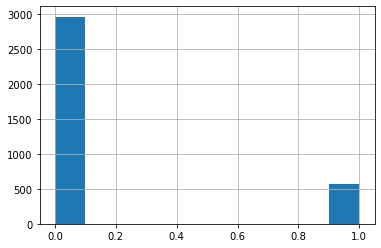

In [91]:
df_labels.hist()
plt.show()

Donc ce modèle n'est pas assez précis : erreur de 0.3

### DecisionTreeRegressor

In [92]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(df_prepared, df_labels)

DecisionTreeRegressor(random_state=42)

In [93]:
df_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#### Cross-validation

In [94]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [95]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

Résultats pour le DecisionTreeRegressor :

In [96]:
display_scores(tree_rmse_scores)

Scores: [0.2061381  0.16831106 0.19914833 0.2061381  0.17652613 0.21945077
 0.19914833 0.19914833 0.11918282 0.24425211]
Mean: 0.19374440736174364
Standard deviation: 0.03179530374487844


Résultats pour le LinearRegressor :

In [39]:
scores = cross_val_score(lin_reg, df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [0.32916157 0.34608961 0.38289569 0.32378146 0.34955202 0.36083746
 0.36709935 0.34052847 0.33990668 0.34106295]
Mean: 0.3480915261934184
Standard deviation: 0.01692377668790955


### RandomForestRegressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(df_prepared, df_labels)

df_predictions = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_labels, df_predictions)
forest_rmse = np.sqrt(tree_mse)
forest_rmse

0.0

In [41]:
print(df_labels[10:20])
print("Predictions:", [round(prediction) for prediction in df_predictions[10:20]])

EmployeeID
1245    0.0
2092    0.0
1179    0.0
3709    0.0
2456    0.0
3084    0.0
3059    0.0
1349    1.0
863     0.0
49      0.0
Name: Attrition, dtype: float64
Predictions: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


#### Score pour le RandomForestRegressor

In [42]:
forest_scores = cross_val_score(forest_reg, df_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.15905172 0.22455496 0.20323168 0.17402094 0.18088545 0.20852918
 0.18375991 0.18236719 0.16462768 0.19054348]
Mean: 0.18715721882617392
Standard deviation: 0.01915486608585323


In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # essaye 12 (3×4) combinaisons des hyperparametres
    {'n_estimators': [3, 10, 30, 40], 'max_features': [2, 4, 6, 8]},
    # puis essaye 6 (2×3) combinaisons avec bootstrap à False (True étant la valeur par défaut)
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

# 5 sous-jeux de cross-val, ça fait en tout (12+6)*5=90 tours d'entraînement 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(df_prepared, df_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 40]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [44]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 10}

In [45]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=2, n_estimators=10,
                      random_state=42)

In [46]:
forest_reg = grid_search.best_estimator_
forest_reg.fit(df_prepared, df_labels)

cvres_scores = cross_val_score(forest_reg, df_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)
cvres_rmse_scores = np.sqrt(-cvres_scores)
display_scores(cvres_rmse_scores)

Scores: [0.09461417 0.15958516 0.13338054 0.1037539  0.1082961  0.12762818
 0.13756276 0.11769746 0.08012774 0.11726039]
Mean: 0.11799063970977723
Standard deviation: 0.021726134807338048


### Perceptron

In [47]:
from sklearn.linear_model import Perceptron

percept_reg = Perceptron(random_state=42)
percept_reg.fit(df_prepared, df_labels)

Perceptron(random_state=42)

In [48]:
df_predictions = percept_reg.predict(df_prepared)
percept_mse = mean_squared_error(df_labels, df_predictions)
percept_rmse = np.sqrt(percept_mse)
percept_rmse

0.407553399252945

In [49]:
cvres_scores = cross_val_score(percept_reg, df_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)
cvres_rmse_scores = np.sqrt(-cvres_scores)
display_scores(cvres_rmse_scores)

Scores: [0.40183714 0.46400156 0.39829666 0.40882614 0.4484787  0.4053467
 0.44211698 0.40882614 0.41628771 0.41628771]
Mean: 0.42103054273157364
Standard deviation: 0.0212570713230517


### Conclusion

Le meilleur modèle est le **_RandomForestRegressor(bootstrap=False, max_features=2, n_estimators=10, random_state=42)_**

##               <center>  <br /> <br />  3. Classification </center> 

In [50]:
X = df_ethical.copy()
X.drop("Attrition", axis=1, inplace=True)

y = df_ethical["Attrition"].copy()

#### Constitution du jeu de test et du jeu d'entraînement

In [51]:
train_size = int(len(X)*0.8)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]
print(f"Train size: {train_size}\nTest size: {4410-train_size}")

Train size: 3528
Test size: 882


On mélange les données et les étiquettes pour le jeu d'entraînement

In [52]:
shuffle_index = np.random.permutation(train_size)
X_train, y_train = [X.iloc[index] for index in shuffle_index], [y.iloc[index] for index in shuffle_index]

### Classifieur binaire

In [53]:
y_train_1 = [y == 1 for y in y_train]
y_test_1 = [y == 1 for y in y_test]

In [54]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(max_iter=5, random_state=42)

In [103]:
# is_attrition = False
# 
# while not is_attrition:
#     random_index = np.random.randint(len(X_train), size=1)[0]
#     some_data = X_test.iloc[random_index]
#     is_attrition = y.iloc[random_index] == 1

random_index = np.random.randint(len(X_train), size=1)[0]
some_data = X_train[random_index]

print(some_data)
print(f"\nAttrition for employee n°{random_index}:", y.iloc[random_index])

EnvironmentSatisfaction       0.333333
JobSatisfaction               0.666667
WorkLifeBalance               0.666667
Age                           0.452381
BusinessTravel                0.000000
Department                    0.500000
DistanceFromHome              0.000000
Education                     0.500000
EducationField                0.600000
EmployeeCount                 0.000000
JobLevel                      0.500000
JobRole                       0.250000
MonthlyIncome                 0.052607
NumCompaniesWorked            0.333333
PercentSalaryHike             0.785714
TotalWorkingYears             0.375000
YearsAtCompany                0.325000
YearsSinceLastPromotion       0.666667
YearsWithCurrManager          0.411765
JobInvolvement                0.333333
PerformanceRating             1.000000
AverageTimeWorkedInTheYear    0.899929
Name: 3081, dtype: float64

Attrition for employee n°1030: 0.0


In [56]:
sgd_clf.predict([some_data])

array([0.])

#### Cross-validation

In [57]:
cross_val_score(sgd_clf, X_train, y_train_1, cv=3, scoring="accuracy")

array([0.84438776, 0.84013605, 0.83843537])

In [58]:
from sklearn.base import BaseEstimator
class Never1Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros(len(X))

In [59]:
never_1_clf = Never1Classifier()
cross_val_score(never_1_clf, X_train, y_train_1, cv=3, scoring="accuracy")

array([0.84098639, 0.83163265, 0.83673469])

#### Matrice de confusion

In [60]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_1, cv=3)

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_1, y_train_pred)

array([[2893,   58],
       [ 503,   74]], dtype=int64)

Comparaison avec un classifieur parfait

In [62]:
y_train_perfect_predictions = y_train_1
confusion_matrix(y_train_1, y_train_perfect_predictions)

array([[2951,    0],
       [   0,  577]], dtype=int64)

### RandomForestClassifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_1, cv=3)

In [64]:
confusion_matrix(y_train_1, y_probas_forest)

array([[2934,   17],
       [ 124,  453]], dtype=int64)

### DescisionTreeClassifier

In [65]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_probas_dt = cross_val_predict(dt_clf, X_train, y_train_1, cv=3)

In [66]:
confusion_matrix(y_train_1, y_probas_dt)

array([[2794,  157],
       [ 118,  459]], dtype=int64)

### MLP Classifier

In [67]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(random_state=42)
mlp_clf.fit(X_train, y_train)
y_probas_mlp = cross_val_predict(mlp_clf, X_train, y_train_1, cv=3)

_Remarque : plus long à exécuter que les autres (env. 15/20 secondes)_

In [68]:
confusion_matrix(y_train_1, y_probas_mlp)

array([[2834,  117],
       [ 315,  262]], dtype=int64)

### Evaluation des métriques

In [69]:
from sklearn.metrics import precision_score, recall_score
precision_score_sgd = precision_score(y_train_1, y_train_pred)
precision_score_forest = precision_score(y_train_1, y_probas_forest)
precision_score_dt = precision_score(y_train_1, y_probas_dt)
precision_score_mlp = precision_score(y_train_1, y_probas_mlp)

print(f"Precision score SGD: {precision_score_sgd}\nPrecision score Forest: {precision_score_forest}\nPrecision Decision Tree: {precision_score_dt}\nPrecision MLP: {precision_score_mlp}")

Precision score SGD: 0.5606060606060606
Precision score Forest: 0.9638297872340426
Precision Decision Tree: 0.7451298701298701
Precision MLP: 0.6912928759894459


In [70]:
recall_score_sgd = recall_score(y_train_1, y_train_pred)
recall_score_forest = recall_score(y_train_1, y_probas_forest)
recall_score_dt = recall_score(y_train_1, y_probas_dt)
recall_score_mlp = recall_score(y_train_1, y_probas_mlp)

print(f"Recall score SGD: {recall_score_sgd}\nRecall score Forest: {recall_score_forest}\nRecall score Decision tree: {recall_score_dt}\nRecall score MLP: {recall_score_mlp}")

Recall score SGD: 0.12824956672443674
Recall score Forest: 0.7850953206239168
Recall score Decision tree: 0.7954939341421143
Recall score MLP: 0.4540727902946274


In [71]:
from sklearn.metrics import f1_score
f1_score_sgd = f1_score(y_train_1, y_train_pred)
f1_score_forest = f1_score(y_train_1, y_probas_forest)
f1_score_dt = f1_score(y_train_1, y_probas_dt)
f1_score_mlp = f1_score(y_train_1, y_probas_mlp)

print(f"F1 SGD: {f1_score_sgd}\nF1 Forest: {f1_score_forest}\nF1 Decision tree: {f1_score_dt}\nF1 MLP: {f1_score_mlp}")

F1 SGD: 0.20874471086036672
F1 Forest: 0.8653295128939829
F1 Decision tree: 0.7694886839899412
F1 MLP: 0.5481171548117155


### Courbe ROC

In [72]:
from sklearn.metrics import roc_curve

y_scores_sgd = cross_val_predict(sgd_clf, X_train, y_train_1, cv=3,
                             method="decision_function")
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_1, cv=3,
                             method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]

y_probas_dt = cross_val_predict(dt_clf, X_train, y_train_1, cv=3,
                             method="predict_proba")
y_scores_dt = y_probas_dt[:, 1]

y_probas_mlp = cross_val_predict(mlp_clf, X_train, y_train_1, cv=3,
                             method="predict_proba")
y_scores_mlp = y_probas_mlp[:, 1]

fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train_1, y_scores_sgd)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_1, y_scores_forest)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_train_1, y_scores_dt)
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_train_1, y_scores_mlp)

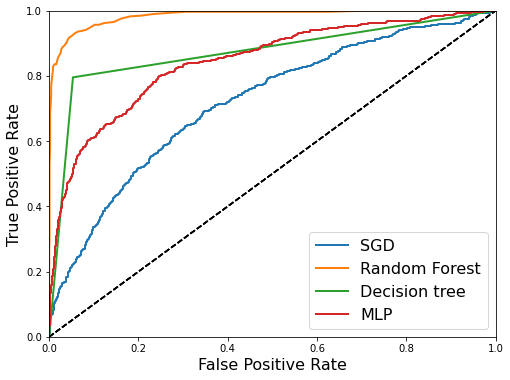

In [73]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_sgd, tpr_sgd, "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_dt, tpr_dt, "Decision tree")
plot_roc_curve(fpr_mlp, tpr_mlp, "MLP")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [74]:
from sklearn.metrics import auc

auc_sgd = auc(fpr_sgd, tpr_sgd)
auc_forest = auc(fpr_forest, tpr_forest)
auc_dt = auc(fpr_dt, tpr_dt)
auc_mlp = auc(fpr_mlp, tpr_mlp)

print(f"AUC SGD: {auc_sgd}\nAUC Forest: {auc_forest}\nAUC Decision tree: {auc_dt}\nAUC MLP: {auc_mlp}")

AUC SGD: 0.719749554684926
AUC Forest: 0.984138385072886
AUC Decision tree: 0.8711458149192441
AUC MLP: 0.8449698630490973


### Conclusion

Le modèle de RandomForestClassifier semble être le plus performant pour notre jeu de données.

## Test avec le jeu de test

In [75]:
def classifierStats(clf, nb_tests):
    successes = 0
    fails = 0
    for i in range(nb_tests):
        random_index = np.random.randint(len(X_test), size=1)[0]
        some_data = X_test.iloc[random_index]
        is_attrition = y.iloc[random_index] == 1
        
        success = True if clf.predict([some_data])[0] == y.iloc[random_index] else False
        if success:
            successes += 1
        else:
            fails += 1
    
    mean_of_successes = successes/(successes+fails)
    return successes, mean_of_successes

In [76]:
classifierStats(forest_clf, 50)

(42, 0.84)

#### Visualisation de la performance de notre modèle de classification

In [77]:
import matplotlib.pylab as plt

def plotDict(dict, x_max, y_max, y_label="", label=""):
    lists = sorted(dict.items())

    x, y = zip(*lists)
    
    plt.plot(x, y, linewidth=2, label=label)
    plt.axis([1, x_max, 0, y_max])
    plt.xlabel('Number of tests', fontsize=16)
    plt.ylabel(y_label, fontsize=16)

def plotClassifierStats(clfs, number_of_execution=10, number_of_tries_per_execution=50):    
    stats = dict()
    
    for classifier in clfs:
        no_of_successes_per_execution = dict()
        mean_of_successes_per_execution = dict()

        for i in range(number_of_execution):
            result = classifierStats(classifier, number_of_tries_per_execution)
            no_of_successes_per_execution[i+1] = result[0]
            mean_of_successes_per_execution[i+1] = result[1]

        model_name = str(type(classifier)).split('.')[-1].replace("\'>", '')
        
        stats[model_name] = [no_of_successes_per_execution, mean_of_successes_per_execution]
    
    plt.figure(figsize=(8, 6))
    for key in stats.keys():    
        plotDict(stats[key][0], x_max=number_of_execution, y_max=number_of_tries_per_execution,
                 y_label="Number of successes per test", label=key)
    plt.legend(loc="lower right", fontsize=16)
    plt.show()
    
    for key in stats.keys(): 
        plotDict(stats[key][1], x_max=number_of_execution, y_max=1,
                 y_label="Mean of successes per test", label=key)
    plt.legend(loc="lower right", fontsize=16)
    plt.show()

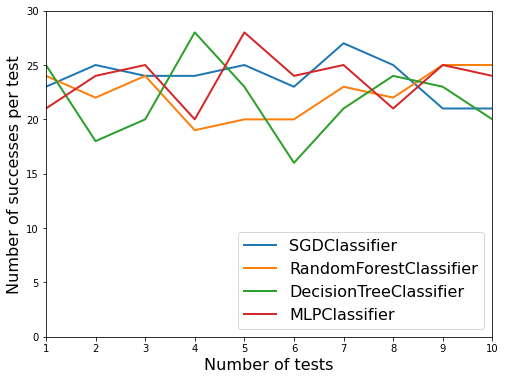

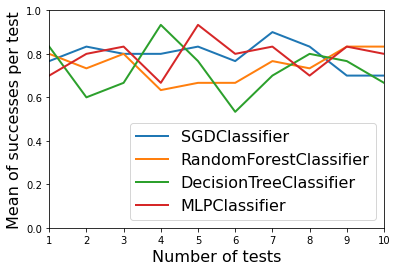

In [78]:
classifiers = [
    sgd_clf,
    forest_clf,
    dt_clf,
    mlp_clf
]

plotClassifierStats(
    classifiers,
    number_of_execution=10,
    number_of_tries_per_execution=30
)

On observe que les différents classifieurs ont une moyenne de réussite de prédiction autour de 75%.

### Variation de paramètres

On souhaite à présent effectuer des tests avec nos classifieurs en faisant varier certains paramètres comme le salaire mensuel, la distance par rapport au lieu de travail, etc.

In [114]:
df_processed.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,AverageTimeWorkedInTheYear
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,0.666667,1.000000,0.333333,0.785714,0.0,1.0,1.0,0.178571,0.25,0.2,...,0.637546,0.111111,0.000000,0.025,0.025,0.000000,0.000000,0.666667,0.0,0.263270
2,0.666667,0.333333,1.000000,0.309524,1.0,0.5,0.5,0.321429,0.00,0.2,...,0.167457,0.000000,0.857143,0.150,0.125,0.066667,0.235294,0.333333,1.0,0.344014
3,0.333333,0.333333,0.000000,0.333333,0.0,0.5,0.5,0.571429,0.75,0.8,...,0.964666,0.111111,0.285714,0.125,0.125,0.000000,0.176471,0.666667,0.0,0.253461
4,1.000000,1.000000,0.666667,0.476190,0.0,0.0,0.5,0.035714,1.00,0.2,...,0.385045,0.333333,0.000000,0.325,0.200,0.466667,0.294118,0.333333,0.0,0.248594
5,1.000000,0.000000,0.666667,0.333333,0.0,1.0,0.5,0.321429,0.00,0.6,...,0.070195,0.444444,0.071429,0.225,0.150,0.000000,0.235294,0.666667,0.0,0.445745


In [135]:
def testWithModidiedValue(df, classifier, value_name, new_value, number_of_tries=5):
    results = []
    
    for i in range(number_of_tries):
        df_test_values = df.copy()
        df_test_values.drop("Attrition", axis=1, inplace=True)

        df_test_labels = df["Attrition"].copy()

        random_index = np.random.randint(len(df_test_values.index), size=1)[0]
        some_data = df_test_values.iloc[[random_index]]

        some_data[value_name] = new_value
        results
        results.append(classifier.predict(some_data))
    mean = results.count([1.])*100/len(results)
    return f"{mean}% of chance that the person leaves within 1 year"

In [144]:
testWithModidiedValue(df_processed, forest_clf, "MonthlyIncome", 0, number_of_tries=50)

'14.0% of chance that the person leaves within 1 year'